In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/collin/Documents/Howard Group Project/Report/nasa_archive_detection_method.csv')
df.drop('disc_year', axis=1, inplace = True)
df.drop('orbital period', axis=1, inplace = True)
df.drop('mass J', axis=1, inplace = True)
df.dropna(inplace = True)
df.reset_index(inplace = True, drop = True)
df.describe()

,semimajor axis,mass E
count,3262.000000,3262.000000
mean,8.546342,746.760704
std,108.142573,1247.483095
min,0.004400,0.015000
25%,0.048192,82.950907
50%,0.163000,311.473400
75%,1.528750,778.675125
max,3500.000000,17668.169700


In [3]:
for i in np.arange(len(df['pl_name'])):
    if i == 3261:
        break
    elif df['pl_name'].loc[i] == df['pl_name'].loc[i+1]:
        df.drop(index = i, inplace = True)
df.reset_index(inplace = True, drop = True)
df.describe()

,semimajor axis,mass E
count,1660.000000,1660.000000
mean,13.565020,784.034996
std,146.806546,1357.547413
min,0.004400,0.020000
25%,0.050987,32.175207
50%,0.170000,273.009070
75%,1.494000,794.500000
max,3500.000000,10710.871000


In [4]:
print('There are', len(df['pl_name'].unique()), 'unique planets for which the relevant data is reported in the NASA archive')

There are 1660 unique planets for which the relevant data is reported in the NASA archive


In [5]:
df_rv = df[df['discoverymethod']=='Radial Velocity']
df_transit = df[df['discoverymethod']=='Transit']
df_ect = df[df['discoverymethod']=='Eclipse Timing Variations']
df_ttv = df[df['discoverymethod']=='Transit Timing Variations']
df_ptv = df[df['discoverymethod']=='Pulsation Timing Variations']
df_imaging = df[df['discoverymethod']=='Imaging']
df_lensing = df[df['discoverymethod']=='Microlensing']
print('The number of rv discoveries is:',len(df_rv['discoverymethod']))
print('The number of transit discoveries is:',len(df_transit['discoverymethod']))
print('The number of timing discoveries is:',(len(df_ect['discoverymethod'])+len(df_ttv['discoverymethod'])+len(df_ptv['discoverymethod'])))
print('The number of imaging discoveries is:',len(df_imaging['discoverymethod']))
print('The number of microlensing discoveries is:',len(df_lensing['discoverymethod']))

The number of rv discoveries is: 789
The number of transit discoveries is: 692
The number of timing discoveries is: 24
The number of imaging discoveries is: 46
The number of microlensing discoveries is: 97


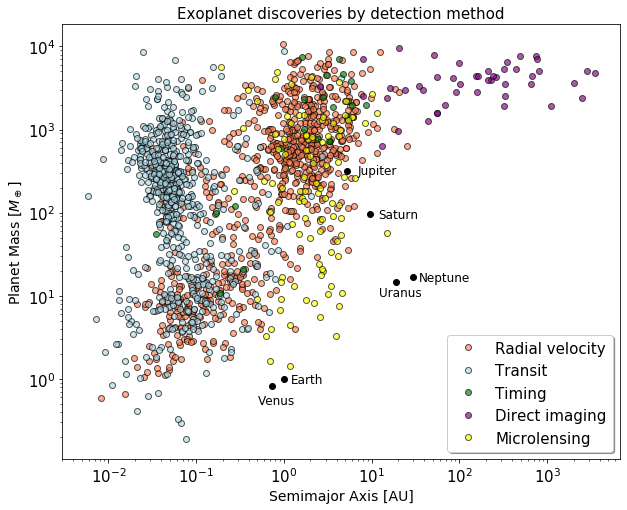

In [7]:
%matplotlib inline
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(df_rv['semimajor axis'], df_rv['mass E'], 
        'o', c='coral', markeredgecolor='black', alpha=0.65, label='Radial velocity')
ax.plot(df_transit['semimajor axis'], df_transit['mass E'], 
        'o', c='lightblue', markeredgecolor='black', alpha=0.65, label='Transit')
ax.plot(df_ect['semimajor axis'], df_ect['mass E'],
        'o', c="green", markeredgecolor='black', alpha=0.65, label='Timing')
ax.plot(df_ttv['semimajor axis'], df_ttv['mass E'],
        'o', c="green", markeredgecolor='black', alpha=0.65)
ax.plot(df_ptv['semimajor axis'], df_ptv['mass E'], 
        'o', c="green", markeredgecolor='black', alpha=0.65)
ax.plot(df_imaging['semimajor axis'], df_imaging['mass E'], 
        'o', c="purple", markeredgecolor='black', alpha=0.65, label='Direct imaging')
ax.plot(df_lensing['semimajor axis'], df_lensing['mass E'],
        'o', c="yellow", markeredgecolor='black', alpha=0.65, label='Microlensing')
ax.plot(1, 1, 'o', c='black') #Earth
ax.plot(0.723, 0.815, 'o', c='black') #Venus
ax.plot(5.2, 318, 'o', c='black') #Jupiter
ax.plot(9.6, 95, 'o', c='black') #Saturn
ax.plot(19.2, 14.5, 'o', c='black') #Uranus
ax.plot(30, 17, 'o', c='black') #Neptune

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Semimajor Axis [AU]', fontsize=14)
ax.set_ylabel('Planet Mass [$M_\oplus$]', fontsize=14)
ax.set_title('Exoplanet discoveries by detection method', size =15)
#cmap=plt.cm.get_cmap('cubehelix', 6)
ax.annotate('Earth', xy=(1.2, 0.9), size = 12)
ax.annotate('Venus', xy=(0.5, 0.5), size = 12)
ax.annotate('Jupiter', xy=(7, 290), size = 12)
ax.annotate('Saturn', xy=(12, 85), size = 12)
ax.annotate('Uranus', xy=(12, 10), size = 12)
ax.annotate('Neptune', xy=(35, 15), size = 12)
ax.tick_params(axis='both', which='major', labelsize=15)

plt.legend(shadow = True, prop={'size': 15})

fig.savefig("discoveries_by_method.png")

### Note that this plot omits more than half of the exoplanets in the NASA archive and is biased toward radial velocity discoveries for which mass is more readily constrained than other methods.

In [80]:
df = pd.read_csv('/Users/collin/Documents/Howard Group Project/Report/nasa_archive_detection_method.csv')
df.drop('disc_year', axis=1, inplace = True)
df.drop('semimajor axis', axis=1, inplace = True)
df.drop('mass J', axis=1, inplace = True)
df.dropna(inplace = True)
df.reset_index(inplace = True, drop = True)
df.describe()

,orbital period,mass E
count,3.615000e+03,3615.000000
mean,2.577610e+03,645.059244
std,1.214540e+05,1197.406562
min,9.070629e-02,0.015000
25%,3.581337e+00,34.400000
50%,1.160900e+01,268.884180
75%,3.300000e+02,667.588000
max,7.300000e+06,25426.400000


In [81]:
for i in np.arange(len(df['pl_name'])):
    if i == 3261:
        break
    elif df['pl_name'].loc[i] == df['pl_name'].loc[i+1]:
        df.drop(index = i, inplace = True)
df.reset_index(inplace = True, drop = True)
df.describe()

,orbital period,mass E
count,1.983000e+03,1983.000000
mean,4.349139e+03,648.045431
std,1.639801e+05,1295.558845
min,9.070629e-02,0.020000
25%,3.853390e+00,22.450000
50%,1.175900e+01,233.922880
75%,2.813475e+02,635.660000
max,7.300000e+06,25426.400000


In [82]:
print('There are', len(df['pl_name'].unique()),
      'unique planets for which mass and orbital period data is reported in the NASA archive')

There are 1758 unique planets for which mass and orbital period data is reported in the NASA archive


In [83]:
df_rv = df[df['discoverymethod']=='Radial Velocity']
df_transit = df[df['discoverymethod']=='Transit']
df_ect = df[df['discoverymethod']=='Eclipse Timing Variations']
df_ttv = df[df['discoverymethod']=='Transit Timing Variations']
df_ptv = df[df['discoverymethod']=='Pulsation Timing Variations']
df_imaging = df[df['discoverymethod']=='Imaging']
df_lensing = df[df['discoverymethod']=='Microlensing']
print('The number of rv discoveries is:',len(df_rv['discoverymethod']))
print('The number of transit discoveries is:',len(df_transit['discoverymethod']))
print('The number of timing discoveries is:',(len(df_ect['discoverymethod'])+len(df_ttv['discoverymethod'])+len(df_ptv['discoverymethod'])))
print('The number of imaging discoveries is:',len(df_imaging['discoverymethod']))
print('The number of microlensing discoveries is:',len(df_lensing['discoverymethod']))

The number of rv discoveries is: 858
The number of transit discoveries is: 1061
The number of timing discoveries is: 35
The number of imaging discoveries is: 10
The number of microlensing discoveries is: 9


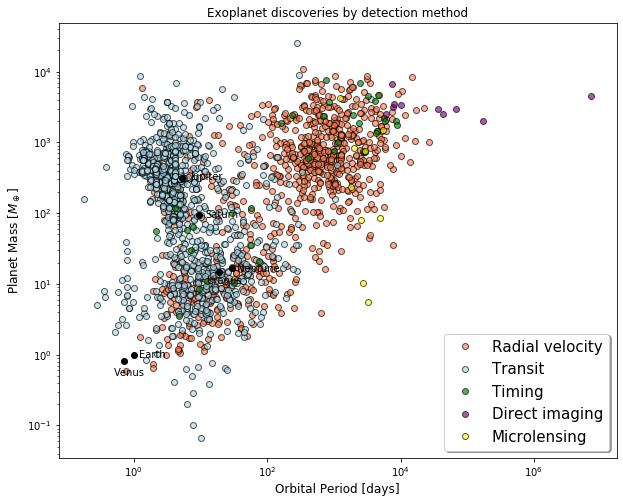

In [85]:
%matplotlib inline
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(df_rv['orbital period'], df_rv['mass E'], 
        'o', c='coral', markeredgecolor='black', alpha=0.65, label='Radial velocity')
ax.plot(df_transit['orbital period'], df_transit['mass E'], 
        'o', c='lightblue', markeredgecolor='black', alpha=0.65, label='Transit')
ax.plot(df_ect['orbital period'], df_ect['mass E'],
        'o', c="green", markeredgecolor='black', alpha=0.65, label='Timing')
ax.plot(df_ttv['orbital period'], df_ttv['mass E'],
        'o', c="green", markeredgecolor='black', alpha=0.65)
ax.plot(df_ptv['orbital period'], df_ptv['mass E'], 
        'o', c="green", markeredgecolor='black', alpha=0.65)
ax.plot(df_imaging['orbital period'], df_imaging['mass E'], 
        'o', c="purple", markeredgecolor='black', alpha=0.65, label='Direct imaging')
ax.plot(df_lensing['orbital period'], df_lensing['mass E'],
        'o', c="yellow", markeredgecolor='black', alpha=0.65, label='Microlensing')
ax.plot(1, 1, 'o', c='black') #Earth
ax.plot(0.723, 0.815, 'o', c='black') #Venus
ax.plot(5.2, 318, 'o', c='black') #Jupiter
ax.plot(9.6, 95, 'o', c='black') #Saturn
ax.plot(19.2, 14.5, 'o', c='black') #Uranus
ax.plot(30, 17, 'o', c='black') #Neptune

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Orbital Period [days]', fontsize=12)
ax.set_ylabel('Planet Mass [$M_\oplus$]', fontsize=12)
ax.set_title('Exoplanet discoveries by detection method')
#cmap=plt.cm.get_cmap('cubehelix', 6)
ax.annotate('Earth', xy=(1.2, 0.9))
ax.annotate('Venus', xy=(0.5, 0.5))
ax.annotate('Jupiter', xy=(7, 290))
ax.annotate('Saturn', xy=(12, 85))
ax.annotate('Uranus', xy=(12, 10))
ax.annotate('Neptune', xy=(35, 15))

plt.legend(shadow = True, prop={'size': 15})